<a href="https://colab.research.google.com/github/kieramurphy37/DS-2002/blob/main/Kiera_someresults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/abkerper/project_voting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Cloning into 'project_voting'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 185 (delta 46), reused 14 (delta 14), pack-reused 115
Receiving objects: 100% (185/185), 31.59 MiB | 14.42 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [2]:
data_df = pd.read_csv("/content/project_voting/data/rep_dem_votes (1).csv")
data_df.head()

,Unnamed: 0.1,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL
3,5,11166,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,18291,36846,20220315,TOTAL
4,8,11169,2000,VIRGINIA,VA,ALLEGHANY,51005,US PRESIDENT,AL GORE,DEMOCRAT,2214,5123,20220315,TOTAL


# Taking Difference Between Republican Democrat

In [3]:
data_rep = data_df[data_df['party'] == 'REPUBLICAN'].copy()  # Ensure we're working on a copy to avoid modifying the original DataFrame

# Filter data for DEMOCRAT party
data_dem = data_df[data_df['party'] == 'DEMOCRAT']

# Ensure the indices of both DataFrames are aligned
data_rep = data_rep.set_index('state')
data_dem = data_dem.set_index('state')

# Calculate the difference in candidate votes
data_rep['difference'] = data_rep['candidatevotes'] - data_dem['candidatevotes']

# Reset the index to keep 'state' as a column
data_rep.reset_index(inplace=True)
data_rep.head()

,state,Unnamed: 0.1,Unnamed: 0,year,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode,difference
0,VIRGINIA,1,11162,2000,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL,1260
1,VIRGINIA,5,11166,2000,VA,ALBEMARLE,51003,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,18291,36846,20220315,TOTAL,2036
2,VIRGINIA,9,11170,2000,VA,ALLEGHANY,51005,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,2808,5123,20220315,TOTAL,594
3,VIRGINIA,13,11174,2000,VA,AMELIA,51007,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,2947,4788,20220315,TOTAL,1193
4,VIRGINIA,17,11178,2000,VA,AMHERST,51009,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6660,11712,20220315,TOTAL,1848


In [4]:
data_2000r = data_rep[data_rep['year'] == 2000]
data_2004r = data_rep[data_rep['year'] == 2004]
data_2008r = data_rep[data_rep['year'] == 2008]
data_2012r = data_rep[data_rep['year'] == 2012]
data_2016r = data_rep[data_rep['year'] == 2016]
data_2020r = data_rep[data_rep['year'] == 2020]
data_2020r.head()

,state,Unnamed: 0.1,Unnamed: 0,year,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode,difference
670,VIRGINIA,2153,70388,2020,VA,ACCOMACK,51001,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,9172,16962,20220315,TOTAL,1594
671,VIRGINIA,2165,70400,2020,VA,ALBEMARLE,51003,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,20804,64657,20220315,TOTAL,-21662
672,VIRGINIA,2177,70412,2020,VA,ALLEGHANY,51005,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,5859,8203,20220315,TOTAL,3616
673,VIRGINIA,2189,70424,2020,VA,AMELIA,51007,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,5390,7894,20220315,TOTAL,2979
674,VIRGINIA,2201,70436,2020,VA,AMHERST,51009,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,11041,17005,20220315,TOTAL,5369


In [5]:
data_2000 = data_df[(data_df['year'] == 2000)]
data_2004 = data_df[(data_df['year'] == 2004)]
data_2008 = data_df[(data_df['year'] == 2008)]
data_2012 = data_df[(data_df['year'] == 2012)]
data_2016 = data_df[(data_df['year'] == 2016)]
data_2020 = data_df[(data_df['year'] == 2020)]

# Adding Winners

In [6]:
data_by_year = [data_2000, data_2004, data_2008, data_2012, data_2016, data_2020]
df_wins = pd.DataFrame()

for year in data_by_year:
    wins = pd.DataFrame()
    county_names = year['county_name'].values
    county_names = list(set(county_names))
    for county in county_names:
        county_rows = year[year['county_name'] == county]
        max_votes = county_rows['candidatevotes'].idxmax()
        winning_row = year.loc[max_votes]
        wins = pd.concat([wins, pd.DataFrame([winning_row])], ignore_index=True)
    df_wins = pd.concat([df_wins, wins], ignore_index=True)

data_2000 = df_wins[df_wins['year'] == 2000]
data_2004 = df_wins[df_wins['year'] == 2004]
data_2008 = df_wins[df_wins['year'] == 2008]
data_2012 = df_wins[df_wins['year'] == 2012]
data_2016 = df_wins[df_wins['year'] == 2016]
data_2020 = df_wins[df_wins['year'] == 2020]

In [7]:
data_2020 = pd.merge(data_2020, data_2020r[['county_name', 'difference']], on='county_name', how='inner')
data_2020.head(5)

,Unnamed: 0.1,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode,difference
0,2741,70976,2020,VIRGINIA,VA,KING WILLIAM,51101,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,7320,10737,20220315,TOTAL,4060
1,3164,71399,2020,VIRGINIA,VA,STAFFORD,51179,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,40245,79629,20220315,TOTAL,-2609
2,2213,70448,2020,VIRGINIA,VA,APPOMATTOX,51011,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,6702,9268,20220315,TOTAL,4284
3,2177,70412,2020,VIRGINIA,VA,ALLEGHANY,51005,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,5859,8203,20220315,TOTAL,3616
4,3580,71815,2020,VIRGINIA,VA,PETERSBURG CITY,51730,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,12389,14133,20220315,TOTAL,-10805


# Read in and clean population data

In [8]:
demo_2020 = pd.read_csv("/content/project_voting/data/county_data/0002_ds249_20205_county_E.csv", encoding='latin1')

row = demo_2020.iloc[0]  # Row 0 contains the descriptions of the variables

# Prints out each cell to show variables but honestly easier to just look at the codebook
print("Variables in Dataset:")

Variables in Dataset:


<ipython-input-8-4d1738020cf8>:1: DtypeWarning: Columns (3,4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,2

In [9]:
demo_2020 = demo_2020[demo_2020["STUSAB"] == "VA"] # Sorts the df for just VA counties. Can change if we want to look at US as a whole
demo_2020.head()

demo_2020= demo_2020.loc[:,("COUNTY","AMPWE001","AMPWE002","AMPWE003","AMPWE004","AMPWE005",
                     "AMPWE006","AMPWE007","AMPWE008","AMTCE001","AMPLE001","AMPLE002",
                     "AMPLE003")]  #Selects variables we want in the clean df

new_column_names = {"AMPWE001" : "Total Population",
        "AMPWE002":     "White alone",
        "AMPWE003":    "Black or African American alone",
        "AMPWE004":     "American Indian and Alaska Native alone",
        "AMPWE005":     "Asian alone",
        "AMPWE006":     "Native Hawaiian and Other Pacific Islander alone",
        "AMPWE007":     "Some other race alone",
        "AMPWE008":     "Two or more races",
        "AMTCE001":     "Per Capita income in the past 12 months",
        "AMPLE001":     "Median age: Total",
        "AMPLE002":     "Median age: Male",
        "AMPLE003":     "Median age: Female",
}  #These are all taken from the codebook in the github. MAKE SURE YOU'RE LOOKING AT THE RIGHT CODEBOOK FOR THE RIGHT CSV. I didnt realize that until way too late.

demo_2020.rename(columns=new_column_names, inplace=True)
demo_2020.head()

,COUNTY,Total Population,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Per Capita income in the past 12 months,Median age: Total,Median age: Male,Median age: Female
2822,Accomack County,32560,21773,9390,48,244,0,154,951,27012,45.8,42.6,47.1
2823,Albemarle County,108819,87871,10005,315,5981,48,989,3610,46241,39.4,37.7,40.7
2824,Alleghany County,15030,13925,790,0,10,0,64,241,28048,48.0,46.1,50.0
2825,Amelia County,12970,9789,2876,0,1,0,0,304,32799,45.0,44.4,48.6
2826,Amherst County,31782,24330,5758,243,209,12,203,1027,28866,44.9,42.0,46.0


# Merge population and voting data

In [10]:
data_2020= data_2020.rename(columns={'county_name': 'COUNTY'})
data_2020['COUNTY'] = data_2020['COUNTY'].str.lower()
data_2020.head()

demo_2020['COUNTY'] = demo_2020['COUNTY'].str.lower()
demo_2020.head()

demo_2020['COUNTY'] = demo_2020['COUNTY'].str.replace(' ', '')
demo_2020['COUNTY'] = demo_2020['COUNTY'].str.replace('county', '')
data_2020['COUNTY'] = data_2020['COUNTY'].str.replace(' ', '')

demo_2020['COUNTY'] = demo_2020['COUNTY'].str.strip()
data_2020['COUNTY'] = data_2020['COUNTY'].str.strip()
merged_df_2020 = pd.merge(data_2020, demo_2020, on="COUNTY")
merged_df_2020.head()

,Unnamed: 0.1,Unnamed: 0,year,state,state_po,COUNTY,county_fips,office,candidate,party,...,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Per Capita income in the past 12 months,Median age: Total,Median age: Male,Median age: Female
0,2741,70976,2020,VIRGINIA,VA,kingwilliam,51101,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,...,2572,122,237,0,16,676,33261,41.0,37.6,43.0
1,3164,71399,2020,VIRGINIA,VA,stafford,51179,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,...,26899,413,5217,81,8724,11200,43401,35.7,34.4,36.7
2,2213,70448,2020,VIRGINIA,VA,appomattox,51011,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,...,3013,6,31,0,57,322,27889,42.7,40.5,44.3
3,2177,70412,2020,VIRGINIA,VA,alleghany,51005,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,...,790,0,10,0,64,241,28048,48.0,46.1,50.0
4,3580,71815,2020,VIRGINIA,VA,petersburgcity,51730,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,...,23659,134,307,9,781,791,24789,37.2,35.4,39.6


# Regressions

In [26]:
y = merged_df_2020['difference']
vars = ['Median age: Total','Per Capita income in the past 12 months','White alone','Black or African American alone','American Indian and Alaska Native alone','Asian alone','Native Hawaiian and Other Pacific Islander alone','Some other race alone','Two or more races'] # This is a list of variables to use

X = merged_df_2020.loc[:,vars]

In [13]:
from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X, y) # Fit the linear model

In [15]:
reg0 = LinearRegression().fit(X, y) # Fit the linear model
names = reg0.feature_names_in_
coef = pd.DataFrame({'variable':names,'coefficient':reg0.coef_})

print('Intercept: ' + str(reg0.intercept_)+'\n') # Intercept value
print('R2: ' + str(reg0.score(X, y) )) # R squared measure

coef

Intercept: -3379.3974207421033

R2: 0.9280149757740165


,variable,coefficient
0,Median age: Total,433.678955
1,Per Capita income in the past 12 months,-0.470081
2,White alone,0.211378
3,Black or African American alone,-0.613284
4,American Indian and Alaska Native alone,-10.471741
5,Asian alone,-1.519690
6,Native Hawaiian and Other Pacific Islander alone,9.989824
7,Some other race alone,-1.207230
8,Two or more races,1.894316


In [21]:
S = 1000
K = len(names)
slopes = np.zeros([S,K])
intercepts = np.zeros(S)
r2s = np.zeros(S)
N = merged_df_2020['difference'].shape[0]

# Bootstrap:
for s in range(S):
    df_s = merged_df_2020.sample(N,replace=True,axis=0)
    y_s = df_s['difference']
    X_s = X
    #
    reg_s = LinearRegression().fit(X_s, y_s)
    slopes[s,:] = reg_s.coef_.tolist()
    intercepts[s] = reg_s.intercept_
    r2s[s] = reg_s.score(X_s,y_s)

Point Estimate:  0.0686323535875959
CI: [0.01453688 0.18459709]


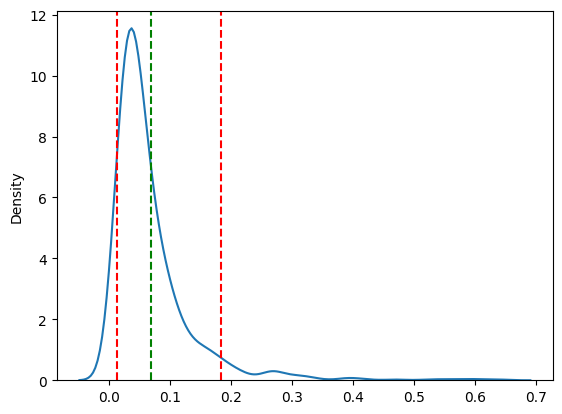

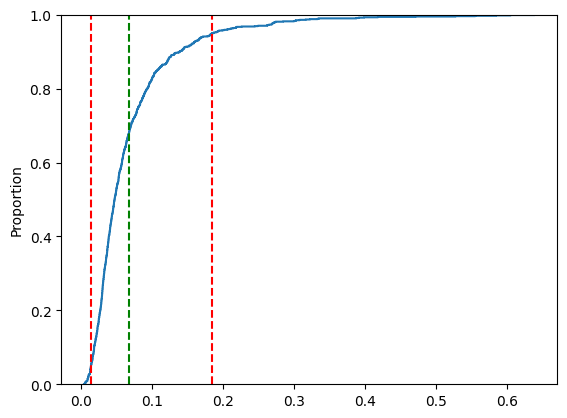

Point Estimate:  -2689.663136329215
CI: [-37335.55397446  24711.36354814]


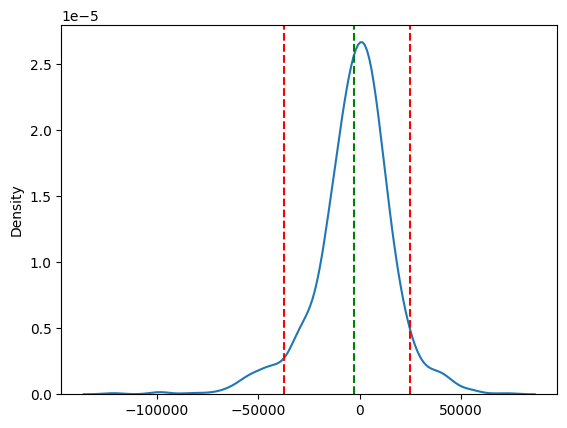

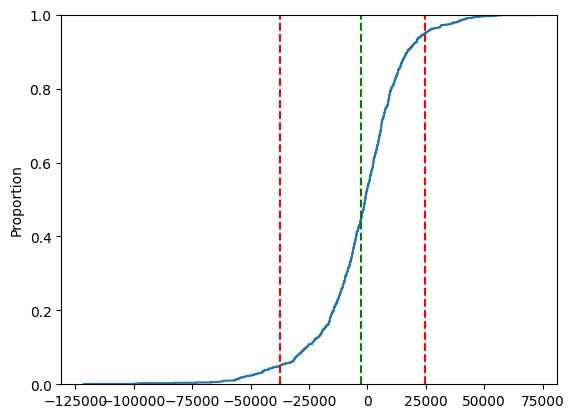

Median age: Total
Point Estimate:  -25.022706532230718
CI: [-648.60510005  653.12123706]


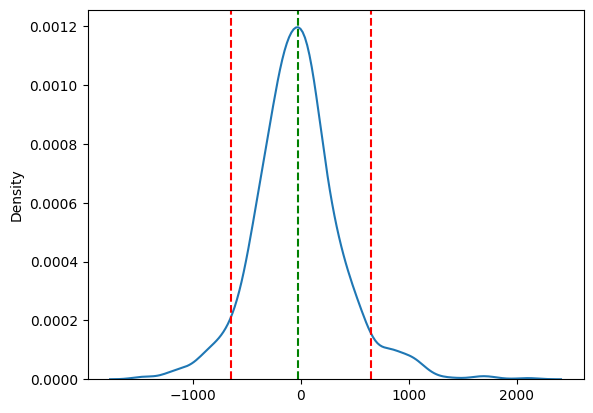

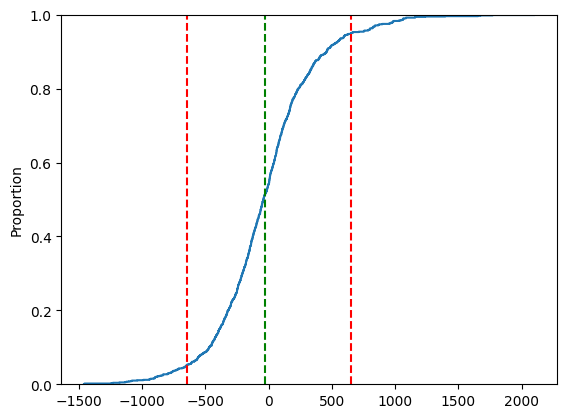

Per Capita income in the past 12 months
Point Estimate:  0.014948478500051127
CI: [-0.43562747  0.43166294]


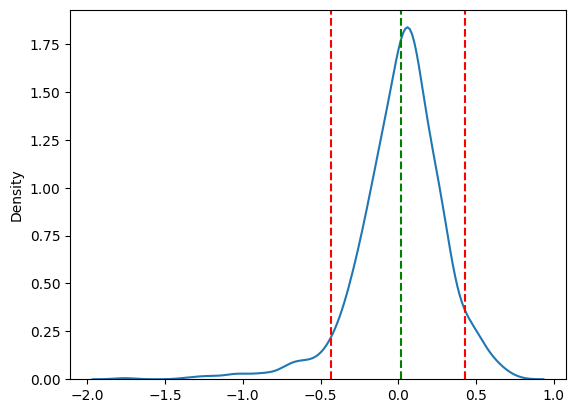

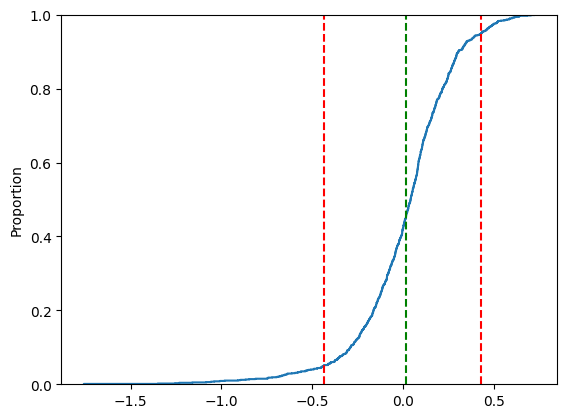

White alone
Point Estimate:  -0.0054499739471542885
CI: [-0.25082626  0.1655348 ]


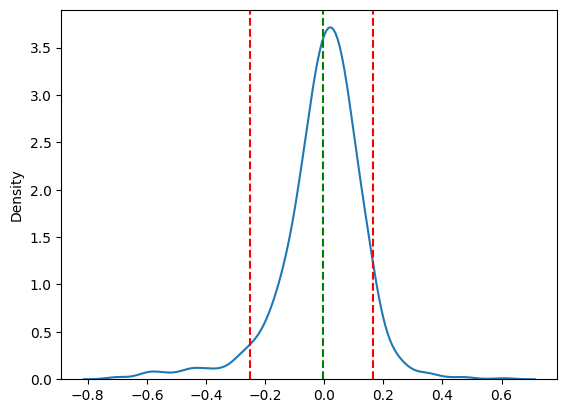

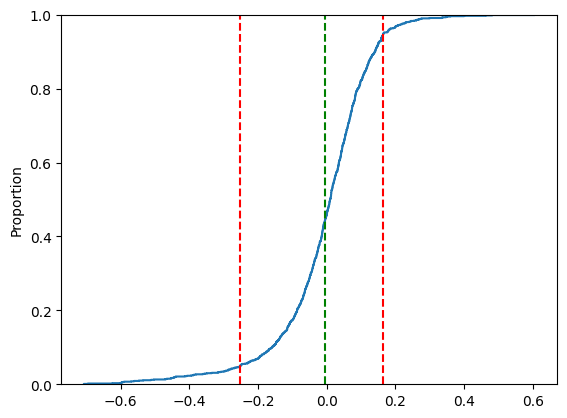

Black or African American alone
Point Estimate:  -0.009388266040852928
CI: [-0.32630885  0.25595792]


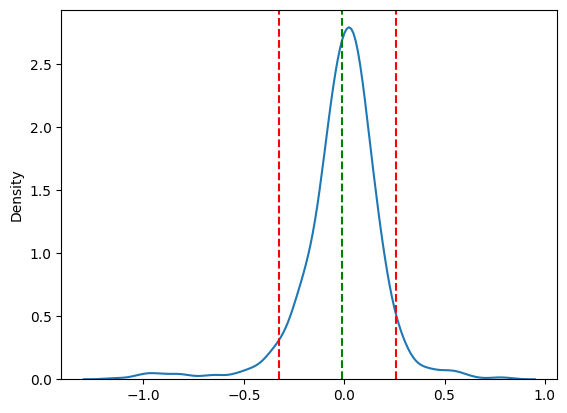

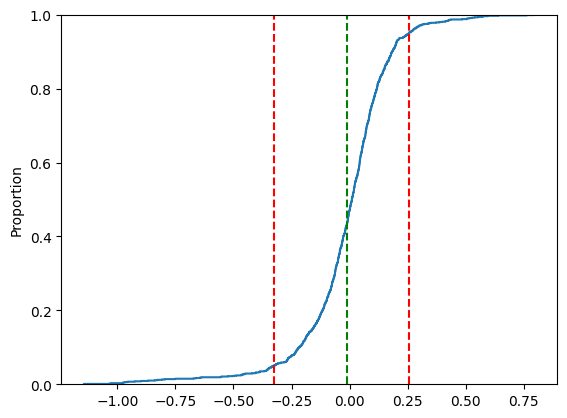

American Indian and Alaska Native alone
Point Estimate:  2.406997031876983
CI: [-49.19954857  47.14181716]


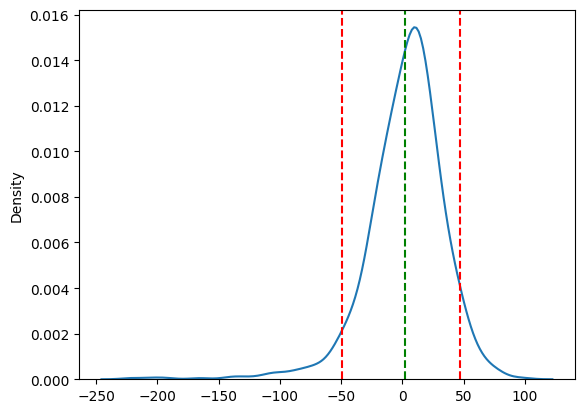

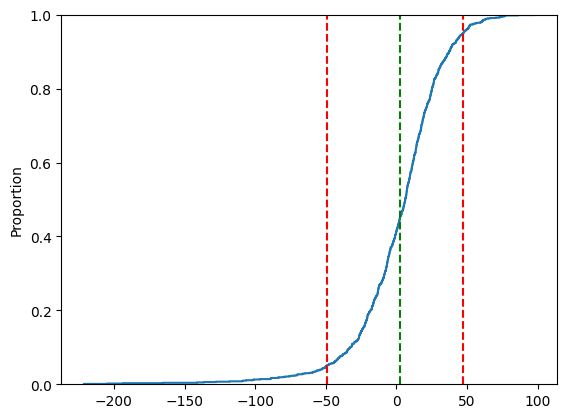

Asian alone
Point Estimate:  -0.01342019487815529
CI: [-0.54497358  0.52401008]


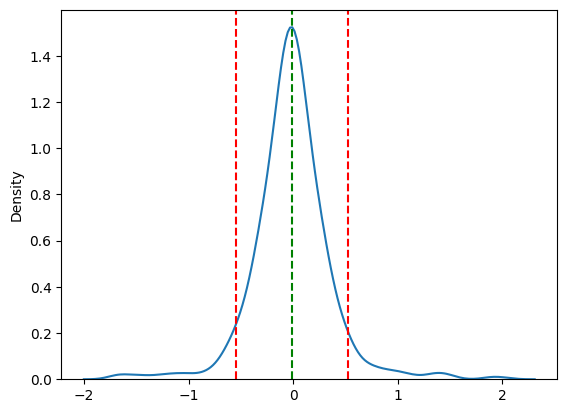

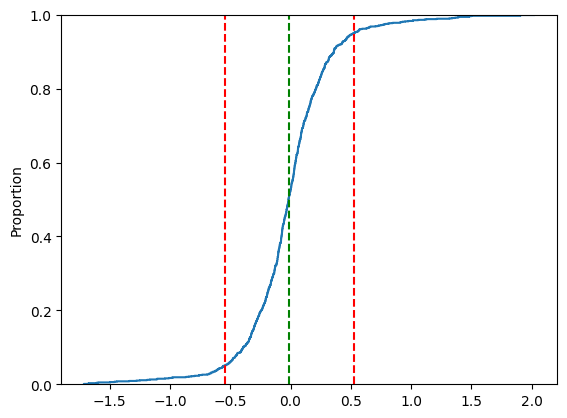

Native Hawaiian and Other Pacific Islander alone
Point Estimate:  0.06621708526955945
CI: [-84.79414892  70.59720652]


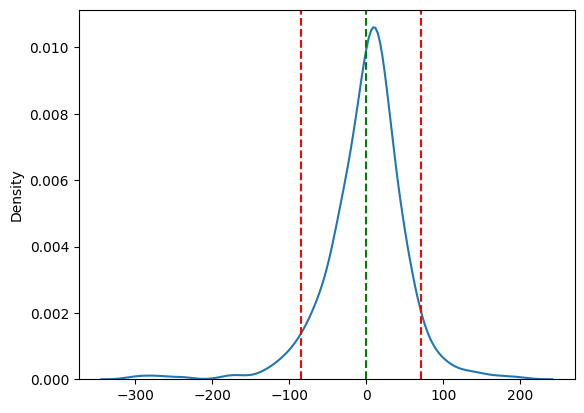

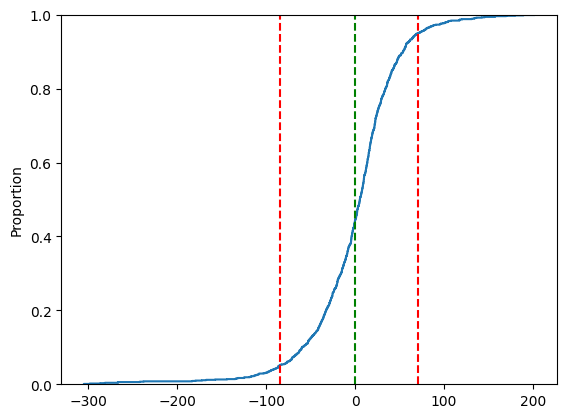

Some other race alone
Point Estimate:  -0.0034408254878000337
CI: [-2.17536273  2.20492948]


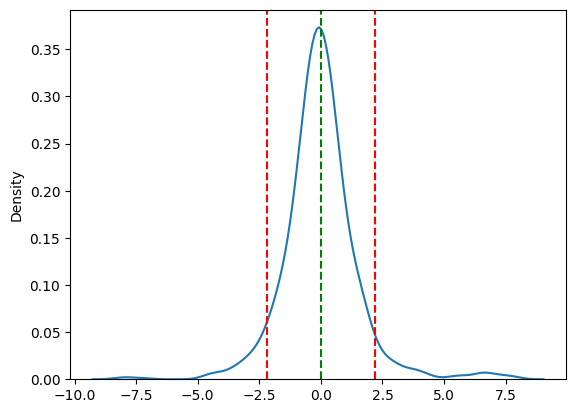

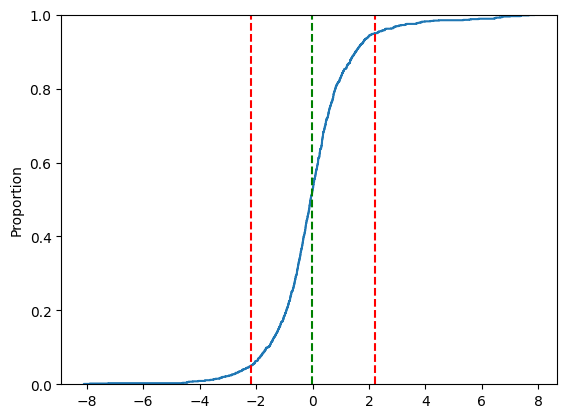

Two or more races
Point Estimate:  -0.010392299196995757
CI: [-3.59242049  3.50808859]


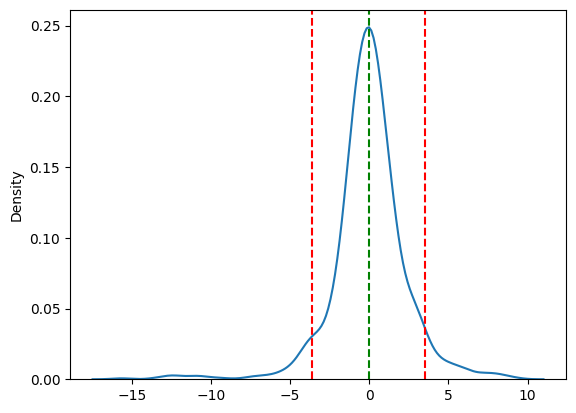

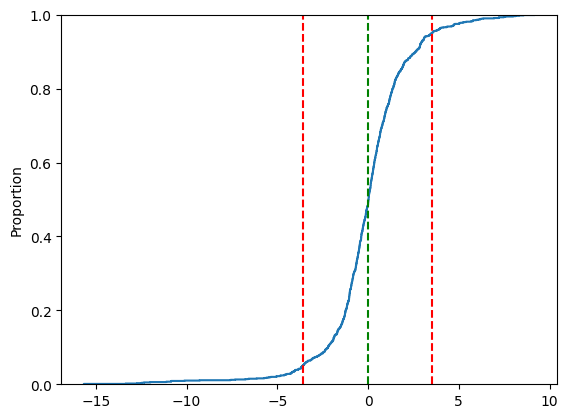

In [22]:
def CI_eval(var): # Uncertainty analysis for var
    CI = np.quantile(var,[.05,.95]) # Compute 90% CI
    print('Point Estimate: ', var.mean())
    print( 'CI: ' + str(CI) )
    # Density plot of differences in rates, CI:
    ax = sns.kdeplot(var)
    ax.axvline(x = var.mean(),linestyle='dashed',color='green') # Point estimate
    ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
    ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
    plt.show()
    # ECDF of differences in rates, CI:
    ax = sns.ecdfplot(var)
    ax.axvline(x = var.mean(),linestyle='dashed',color='green') # Point estimate
    ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
    ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
    plt.show()

CI_eval(r2s)
CI_eval(intercepts)

for k in range(K):
    print(names[k])
    CI_eval(slopes[:,k])